Analyzing global internet patterns

In [1]:
import pandas as pd
import numpy as np
import pycountry_convert as pc
import pycountry
import warnings

In [2]:
df= pd.read_csv('internet_usage.csv')
pop_mondiale = pd.read_csv("pop.csv", skiprows=4)
gdp = pd.read_csv("GDP.csv", skiprows=4)

warnings.filterwarnings("ignore")

In [3]:
df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [4]:
df.iloc[212]

Country Name    Virgin Islands (U.S.)
Country Code                      VIR
2000                          13.8151
2001                          18.3758
2002                          27.4944
2003                          27.4291
2004                           27.377
2005                          27.3443
2006                          27.3326
2007                          27.3393
2008                          27.3618
2009                          27.3965
2010                            31.22
2011                             35.6
2012                          40.5479
2013                             45.3
2014                            50.07
2015                          54.8391
2016                          59.6083
2017                          64.3775
2018                               ..
2019                               ..
2020                               ..
2021                               ..
2022                               ..
2023                               ..
Name: 212, d

## #Internet Usage 

In [5]:
df.columns

Index(['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [6]:
df.shape

(217, 26)

In [7]:
df.columns

Index(['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [8]:
df.isna().sum()

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
dtype: int64

In [9]:
df.drop(index=3, inplace=True)

## #Pop Mondiale Dataframe

In [10]:
pop_mondiale.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


In [11]:
pop_mondiale.shape

(266, 69)

In [12]:
pop_mondiale.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [13]:
# Supprimer les colonnes dont les années sont entre 1960 et 1999
for year in range(1960, 2000):
    if str(year) in pop_mondiale.columns:
        pop_mondiale = pop_mondiale.drop(columns=[str(year)])
pop_mondiale = pop_mondiale.drop(columns=['Indicator Name', 'Indicator Code','Unnamed: 68','Indicator Name'])        

In [14]:
pop_mondiale.columns

Index(['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [15]:
pop_mondiale.isna().sum()

Country Name    0
Country Code    0
2000            1
2001            1
2002            1
2003            1
2004            1
2005            1
2006            1
2007            1
2008            1
2009            1
2010            1
2011            1
2012            1
2013            1
2014            1
2015            1
2016            1
2017            1
2018            1
2019            1
2020            1
2021            1
2022            1
2023            1
dtype: int64

In [16]:
rows_with_missing_data = pop_mondiale[pop_mondiale.isna().any(axis=1)]
print(rows_with_missing_data)

       Country Name Country Code  2000  2001  2002  2003  2004  2005  2006  \
110  Not classified          INX   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     2007  ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
110   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 26 columns]


In [17]:
pop_mondiale = pop_mondiale.drop(index=110)

In [18]:
pop_mondiale.isna().sum()

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
dtype: int64

## #GDP / Hab 

In [19]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.132432,186.947182,197.408105,225.447007,209.005786,226.883067,...,1479.564123,1329.777824,1520.171298,1538.924188,1493.780445,1344.080962,1522.590088,1628.024526,1659.515290,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.938353,127.452629,133.825452,139.006714,148.547736,155.563837,...,1845.767804,1616.843198,1560.162999,1703.896392,1783.654365,1664.249176,1747.840549,1777.235012,1568.724310,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767,NaN


In [20]:
# Supprimer les colonnes dont les années sont entre 1960 et 1999
for year in range(1960, 2000):
    if str(year) in gdp.columns:
        gdp = gdp.drop(columns=[str(year)])
gdp = gdp.drop(columns=['Indicator Name', 'Indicator Code','Unnamed: 68'])   

In [21]:
gdp.columns

Index(['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [22]:
gdp.isna().sum()

Country Name     0
Country Code     0
2000            14
2001            13
2002             9
2003             9
2004             9
2005             9
2006             8
2007             8
2008             7
2009             5
2010             5
2011             4
2012             6
2013             6
2014             5
2015             7
2016             8
2017             8
2018             8
2019             7
2020             8
2021             8
2022            11
2023            23
dtype: int64

In [23]:
rows_with_missing_data = gdp[gdp.isna().any(axis=1)]
print(rows_with_missing_data)

                  Country Name Country Code          2000          2001  \
11              American Samoa          ASM           NaN           NaN   
32                      Bhutan          BTN    771.924911    812.238211   
38             Channel Islands          CHI  43479.194077  41873.740615   
50                        Cuba          CUB   2751.381771   2842.967043   
52              Cayman Islands          CYM           NaN           NaN   
69                     Eritrea          ERI    314.357397    325.409162   
84                   Gibraltar          GIB           NaN           NaN   
91                   Greenland          GRL  19004.003844  19275.433966   
93                        Guam          GUM           NaN           NaN   
108                Isle of Man          IMN  21161.396307  21819.712383   
110             Not classified          INX           NaN           NaN   
130                    Lebanon          LBN   3986.835139   4009.559298   
137              Liechten

In [24]:
print(gdp.iloc[11])

Country Name    American Samoa
Country Code               ASM
2000                       NaN
2001                       NaN
2002               8972.696365
2003               9197.661968
2004               8958.428667
2005                8831.26976
2006               8745.166211
2007               9231.372409
2008              10030.808913
2009              12156.029391
2010              10375.172014
2011              10383.459331
2012              11745.489915
2013              11813.502203
2014              12026.334493
2015              12727.410265
2016               12843.33429
2017              11863.683945
2018              12552.054687
2019              12886.135952
2020              14489.258656
2021              15236.160488
2022              18017.458938
2023                       NaN
Name: 11, dtype: object


In [25]:
gdp.columns

Index(['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [26]:
#Dealing with Missing Value
# Remplir les NaN dans chaque ligne en utilisant les valeurs suivantes (au besoin, de gauche à droite)
gdp = gdp.apply(lambda row: row.fillna(method='bfill', axis=0), axis=1)

# Pour les valeurs manquantes de la dernière colonne (2023), les remplacer par celles de 2022 si elles sont NaN
gdp['2023'] = gdp['2023'].fillna(gdp['2022'])

# Affichage du résultat
print(gdp)

                    Country Name Country Code          2000          2001  \
0                          Aruba          ABW  20681.023027  20740.132583   
1    Africa Eastern and Southern          AFE    707.120376    626.169148   
2                    Afghanistan          AFG    174.930991    138.706822   
3     Africa Western and Central          AFW    516.932316    530.653167   
4                         Angola          AGO    563.733796    533.586202   
..                           ...          ...           ...           ...   
261                       Kosovo          XKX   2877.393314   2877.393314   
262                  Yemen, Rep.          YEM    493.235183    487.141258   
263                 South Africa          ZAF   3217.846934   2847.151919   
264                       Zambia          ZMB    359.429501    396.548953   
265                     Zimbabwe          ZWE    562.556900    566.107647   

             2002          2003          2004          2005          2006  

In [27]:
print(gdp.iloc[11])

Country Name    American Samoa
Country Code               ASM
2000               8972.696365
2001               8972.696365
2002               8972.696365
2003               9197.661968
2004               8958.428667
2005                8831.26976
2006               8745.166211
2007               9231.372409
2008              10030.808913
2009              12156.029391
2010              10375.172014
2011              10383.459331
2012              11745.489915
2013              11813.502203
2014              12026.334493
2015              12727.410265
2016               12843.33429
2017              11863.683945
2018              12552.054687
2019              12886.135952
2020              14489.258656
2021              15236.160488
2022              18017.458938
2023              18017.458938
Name: 11, dtype: object


In [28]:
# In other CSV we have too much country so we decide to keep only those present in the CSV competitions files 

In [29]:
# Extraire les noms des pays du premier DataFrame
countries_to_keep = df['Country Name'].unique()

# Filtrer les autres DataFrames
pop_mondiale_filtered = pop_mondiale[pop_mondiale['Country Name'].isin(countries_to_keep)]
gdp_filtered = gdp[gdp['Country Name'].isin(countries_to_keep)]

In [30]:
pop_mondiale_filtered.shape


(216, 26)

In [31]:
gdp_filtered.shape

(216, 26)

In [32]:
df.shape

(216, 26)

In [33]:
# For beter analysis i want to create a new columns with the continent of the country 

In [34]:
def get_continent_from_country_name(country_name):
    try:
        # Trouver le code alpha-2 du pays à partir du nom
        country = pycountry.countries.get(name=country_name)
        if not country:  # Si non trouvé, essayer avec d'autres variantes
            country = pycountry.countries.search_fuzzy(country_name)[0]
        alpha2_code = country.alpha_2
        # Mapper le code alpha-2 au code continent
        continent_code = pc.country_alpha2_to_continent_code(alpha2_code)
        # Convertir le code continent en nom de continent
        continents = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania",
            "AN": "Antarctica"
        }
        return continents[continent_code]
    except Exception as e:
        return "Unknown"  # Si le pays n'est pas trouvé

In [35]:
df['Continent'] = df['Country Name'].apply(get_continent_from_country_name)
pop_mondiale_filtered['Continent'] = pop_mondiale_filtered['Country Name'].apply(get_continent_from_country_name)
gdp_filtered['Continent'] = gdp_filtered['Country Name'].apply(get_continent_from_country_name)

In [36]:
# Fonction pour déplacer une colonne à la 3ème position
def move_column_to_position(df, col_name, position=2):
    """
    Déplace une colonne à une position donnée dans un DataFrame.
    
    :param df: Le DataFrame dans lequel la colonne doit être déplacée
    :param col_name: Le nom de la colonne à déplacer
    :param position: La position où la colonne doit être déplacée (par défaut 3ème position, index 2)
    :return: DataFrame avec la colonne déplacée
    """
    if col_name in df.columns:
        # Extraire la colonne à déplacer
        col = df.pop(col_name)
        # Insérer la colonne à la position spécifiée
        df.insert(position, col_name, col)
    else:
        print(f"La colonne {col_name} n'existe pas dans le DataFrame.")
    return df

In [37]:
# Appliquer la fonction pour déplacer la colonne 'Continent' à la 3ème position dans chaque DataFrame
df = move_column_to_position(df, 'Continent')
pop_mondiale_filtered = move_column_to_position(pop_mondiale_filtered, 'Continent')
gdp_filtered = move_column_to_position(gdp_filtered, 'Continent')

In [38]:
df.columns

Index(['Country Name', 'Country Code', 'Continent', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [39]:
df.head()

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Asia,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,Europe,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,Africa,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
4,Andorra,AND,Europe,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
5,Angola,AGO,Africa,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.5,...,21.3623,22,23.2,26,29,32.1294,36.6347,37.8067,39.2935,..


In [40]:
gdp_filtered.head()

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,North America,20681.023027,20740.132583,21307.248251,21949.485996,23700.631990,24171.837133,24845.658484,...,26129.839062,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620
2,Afghanistan,AFG,Asia,174.930991,138.706822,178.954088,198.871116,221.763654,254.184249,274.218554,...,625.054942,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417
4,Angola,AGO,Africa,563.733796,533.586202,882.147847,992.698979,1266.210864,1916.468422,2617.051960,...,5005.999741,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767
5,Albania,ALB,Europe,1126.683340,1281.659826,1425.124219,1846.120121,2373.581292,2673.787816,2972.743621,...,4578.633208,3952.803574,4124.055390,4531.032207,5365.489347,5460.428237,5370.778623,6413.283286,6846.426143,8575.171134
6,Andorra,AND,Europe,21810.248743,23511.295148,26528.130158,34063.578403,39021.127810,40829.801877,43467.210993,...,44369.659691,38654.934720,40129.819201,40672.994335,42819.774580,41257.804585,37361.090067,42425.699676,42414.059009,46812.448449


In [41]:
pop_mondiale_filtered.head()

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,North America,90588.0,91439.0,92074.0,93128.0,95138.0,97635.0,99405.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
2,Afghanistan,AFG,Asia,20130327.0,20284307.0,21378117.0,22733049.0,23560654.0,24404567.0,25424094.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
4,Angola,AGO,Africa,16194869.0,16747208.0,17327699.0,17943712.0,18600423.0,19291161.0,20015279.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0
5,Albania,ALB,Europe,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,...,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0
6,Andorra,AND,Europe,65685.0,65852.0,66506.0,69486.0,74325.0,77421.0,79585.0,...,73737.0,72174.0,72181.0,73763.0,75162.0,76474.0,77380.0,78364.0,79705.0,80856.0


## #Clean The DF 

In [42]:
df

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Asia,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,Europe,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,Africa,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
4,Andorra,AND,Europe,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
5,Angola,AGO,Africa,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.5,...,21.3623,22,23.2,26,29,32.1294,36.6347,37.8067,39.2935,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,Unknown,13.8151,18.3758,27.4944,27.4291,27.377,27.3443,27.3326,...,50.07,54.8391,59.6083,64.3775,..,..,..,..,..,..
213,West Bank and Gaza,PSE,Unknown,1.11131,1.83685,3.10009,4.13062,4.4009,16.005,18.41,...,53.6652,56.7,59.9,63.3,64.4,70.6226,76.01,81.83,88.6469,86.6377
214,"Yemen, Rep.",YEM,Unknown,0.0825004,0.0908025,0.518796,0.604734,0.881223,1.0486,1.24782,...,22.55,24.0854,24.5792,26.7184,..,..,13.8152,14.8881,17.6948,..
215,Zambia,ZMB,Africa,0.191072,0.23313,0.477751,0.980483,1.1,1.3,1.6,...,6.5,8.8,10.3,12.2,14.3,18.7,24.4992,26.9505,31.2342,..


In [43]:
# Compter combien de fois ".." apparaît dans le DataFrame
count_dots = (df == '..').sum().sum()

print(f"Le nombre de valeurs '..' dans la DataFrame est : {count_dots}")

Le nombre de valeurs '..' dans la DataFrame est : 581


In [44]:
df.replace("..", np.nan, inplace=True)

In [45]:
df.head()

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Asia,NaN,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,...,7,8.26,11,13.5,16.8,17.6,18.4,NaN,NaN,NaN
1,Albania,ALB,Europe,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,Africa,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,NaN
4,Andorra,AND,Europe,10.5388,NaN,11.2605,13.5464,26.838,37.6058,48.9368,...,86.1,87.9,89.7,91.5675,NaN,90.7187,93.2056,93.8975,94.4855,NaN
5,Angola,AGO,Africa,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.5,...,21.3623,22,23.2,26,29,32.1294,36.6347,37.8067,39.2935,NaN


In [46]:
#Dealing with Missing Value
# Remplir les NaN dans chaque ligne en utilisant les valeurs suivantes (au besoin, de gauche à droite)
df = df.apply(lambda row: row.fillna(method='bfill', axis=0), axis=1)

# Pour les valeurs manquantes de la dernière colonne (2023), les remplacer par celles de 2022 si elles sont NaN
df['2023'] = df['2023'].fillna(df['2022'])

In [47]:
df

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Asia,0.00472257,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,...,7,8.26,11,13.5,16.8,17.6,18.4,NaN,NaN,NaN
1,Albania,ALB,Europe,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,Africa,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,71.2432
4,Andorra,AND,Europe,10.5388,11.2605,11.2605,13.5464,26.838,37.6058,48.9368,...,86.1,87.9,89.7,91.5675,90.7187,90.7187,93.2056,93.8975,94.4855,94.4855
5,Angola,AGO,Africa,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.5,...,21.3623,22,23.2,26,29,32.1294,36.6347,37.8067,39.2935,39.2935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,Unknown,13.8151,18.3758,27.4944,27.4291,27.377,27.3443,27.3326,...,50.07,54.8391,59.6083,64.3775,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,PSE,Unknown,1.11131,1.83685,3.10009,4.13062,4.4009,16.005,18.41,...,53.6652,56.7,59.9,63.3,64.4,70.6226,76.01,81.83,88.6469,86.6377
214,"Yemen, Rep.",YEM,Unknown,0.0825004,0.0908025,0.518796,0.604734,0.881223,1.0486,1.24782,...,22.55,24.0854,24.5792,26.7184,13.8152,13.8152,13.8152,14.8881,17.6948,17.6948
215,Zambia,ZMB,Africa,0.191072,0.23313,0.477751,0.980483,1.1,1.3,1.6,...,6.5,8.8,10.3,12.2,14.3,18.7,24.4992,26.9505,31.2342,31.2342


In [48]:
df.iloc[211]

Country Name    Virgin Islands (U.S.)
Country Code                      VIR
Continent                     Unknown
2000                          13.8151
2001                          18.3758
2002                          27.4944
2003                          27.4291
2004                           27.377
2005                          27.3443
2006                          27.3326
2007                          27.3393
2008                          27.3618
2009                          27.3965
2010                            31.22
2011                             35.6
2012                          40.5479
2013                             45.3
2014                            50.07
2015                          54.8391
2016                          59.6083
2017                          64.3775
2018                              NaN
2019                              NaN
2020                              NaN
2021                              NaN
2022                              NaN
2023        

In [49]:
df = df.fillna(0)

In [50]:
df.iloc[211]

Country Name    Virgin Islands (U.S.)
Country Code                      VIR
Continent                     Unknown
2000                          13.8151
2001                          18.3758
2002                          27.4944
2003                          27.4291
2004                           27.377
2005                          27.3443
2006                          27.3326
2007                          27.3393
2008                          27.3618
2009                          27.3965
2010                            31.22
2011                             35.6
2012                          40.5479
2013                             45.3
2014                            50.07
2015                          54.8391
2016                          59.6083
2017                          64.3775
2018                                0
2019                                0
2020                                0
2021                                0
2022                                0
2023        

In [51]:
df['2023'] = df.apply(lambda row: row['2023'] if pd.notna(row['2023']) else row['2022'], axis=1)

In [52]:
df.iloc[211]

Country Name    Virgin Islands (U.S.)
Country Code                      VIR
Continent                     Unknown
2000                          13.8151
2001                          18.3758
2002                          27.4944
2003                          27.4291
2004                           27.377
2005                          27.3443
2006                          27.3326
2007                          27.3393
2008                          27.3618
2009                          27.3965
2010                            31.22
2011                             35.6
2012                          40.5479
2013                             45.3
2014                            50.07
2015                          54.8391
2016                          59.6083
2017                          64.3775
2018                                0
2019                                0
2020                                0
2021                                0
2022                                0
2023        

In [53]:
#Data Interpolation 

In [54]:
df.dtypes

Country Name    object
Country Code    object
Continent       object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
2019            object
2020            object
2021            object
2022            object
2023            object
dtype: object

In [55]:
# Sélectionner toutes les colonnes des années (de 2000 à 2023)
columns_years = df.columns[3:]

# Trouver les valeurs qui ne sont pas numériques
non_numeric_values = df[columns_years].apply(pd.to_numeric, errors='coerce')

# Afficher les lignes où les valeurs ne peuvent pas être converties en numériques
non_numeric_rows = df[non_numeric_values.isna().any(axis=1)]

In [56]:
df[columns_years] = df[columns_years].apply(pd.to_numeric, errors='coerce')

# Remplacer les NaN par 0 ou une autre valeur si nécessaire
df[columns_years] = df[columns_years].fillna(0).astype(int)


In [57]:
df.dtypes

Country Name    object
Country Code    object
Continent       object
2000             int64
2001             int64
2002             int64
2003             int64
2004             int64
2005             int64
2006             int64
2007             int64
2008             int64
2009             int64
2010             int64
2011             int64
2012             int64
2013             int64
2014             int64
2015             int64
2016             int64
2017             int64
2018             int64
2019             int64
2020             int64
2021             int64
2022             int64
2023             int64
dtype: object

In [58]:
# Sélectionner uniquement les colonnes des années (de 2000 à 2023)
columns_years = df.columns[2:]  # Les colonnes des années commencent à partir de l'index 2

# Convertir toutes les colonnes des années en type numérique, en remplaçant les valeurs non numériques par NaN
df[columns_years] = df[columns_years].apply(pd.to_numeric, errors='coerce')

# Créer une copie des données pour ne pas modifier les valeurs originales
df_copy = df[columns_years].copy()

# Remplacer uniquement les valeurs égales à 0 par NaN dans la copie
df_copy[df_copy == 0] = pd.NA

# Effectuer l'interpolation linéaire sur la copie des données
df_copy = df_copy.interpolate(method='linear', axis=1)

# Remplacer les valeurs dans le DataFrame original uniquement pour les colonnes où il y avait un 0
df[columns_years] = df[columns_years].where(df[columns_years] != 0, df_copy)

# Si nécessaire, utiliser 'bfill' ou 'ffill' pour remplir les valeurs restantes si l'interpolation ne suffit pas
df[columns_years] = df[columns_years].fillna(method='bfill', axis=1).fillna(method='ffill', axis=1)

In [59]:
df.iloc[211]

Country Name    Virgin Islands (U.S.)
Country Code                      VIR
Continent                        13.0
2000                             13.0
2001                             18.0
2002                             27.0
2003                             27.0
2004                             27.0
2005                             27.0
2006                             27.0
2007                             27.0
2008                             27.0
2009                             27.0
2010                             31.0
2011                             35.0
2012                             40.0
2013                             45.0
2014                             50.0
2015                             54.0
2016                             59.0
2017                             64.0
2018                             64.0
2019                             64.0
2020                             64.0
2021                             64.0
2022                             64.0
2023        

In [60]:
## DataSet conclusion 

In [61]:
#Main
df

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,7.0,8.0,11.0,13.0,16.0,17.0,18.0,18.0,18.0,18.0
1,Albania,ALB,2.0,2.0,2.0,2.0,2.0,2.0,6.0,9.0,...,54.0,56.0,59.0,62.0,65.0,68.0,72.0,79.0,82.0,83.0
2,Algeria,DZA,1.0,1.0,1.0,1.0,2.0,4.0,5.0,7.0,...,29.0,38.0,42.0,47.0,49.0,58.0,60.0,66.0,71.0,71.0
4,Andorra,AND,10.0,10.0,11.0,11.0,13.0,26.0,37.0,48.0,...,86.0,87.0,89.0,91.0,90.0,90.0,93.0,93.0,94.0,94.0
5,Angola,AGO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,21.0,22.0,23.0,26.0,29.0,32.0,36.0,37.0,39.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,13.0,13.0,18.0,27.0,27.0,27.0,27.0,27.0,...,50.0,54.0,59.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0
213,West Bank and Gaza,PSE,1.0,1.0,1.0,3.0,4.0,4.0,16.0,18.0,...,53.0,56.0,59.0,63.0,64.0,70.0,76.0,81.0,88.0,86.0
214,"Yemen, Rep.",YEM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,22.0,24.0,24.0,26.0,13.0,13.0,13.0,14.0,17.0,17.0
215,Zambia,ZMB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,8.0,10.0,12.0,14.0,18.0,24.0,26.0,31.0,31.0


In [62]:
#GDP 
gdp_filtered

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,North America,20681.023027,20740.132583,21307.248251,21949.485996,23700.631990,24171.837133,24845.658484,...,26129.839062,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620
2,Afghanistan,AFG,Asia,174.930991,138.706822,178.954088,198.871116,221.763654,254.184249,274.218554,...,625.054942,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417
4,Angola,AGO,Africa,563.733796,533.586202,882.147847,992.698979,1266.210864,1916.468422,2617.051960,...,5005.999741,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767
5,Albania,ALB,Europe,1126.683340,1281.659826,1425.124219,1846.120121,2373.581292,2673.787816,2972.743621,...,4578.633208,3952.803574,4124.055390,4531.032207,5365.489347,5460.428237,5370.778623,6413.283286,6846.426143,8575.171134
6,Andorra,AND,Europe,21810.248743,23511.295148,26528.130158,34063.578403,39021.127810,40829.801877,43467.210993,...,44369.659691,38654.934720,40129.819201,40672.994335,42819.774580,41257.804585,37361.090067,42425.699676,42414.059009,46812.448449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Europe,2877.393314,2877.393314,2877.393314,2877.393314,2877.393314,2877.393314,2877.393314,...,3902.494244,3520.628507,3759.449591,4009.317993,4384.186241,4415.997161,4310.888247,5270.426702,5290.947472,5960.158205
262,"Yemen, Rep.",YEM,Unknown,493.235183,487.141258,513.241487,548.905883,627.632023,734.159908,809.713128,...,1430.164210,1362.173794,975.359407,811.165964,633.887206,623.376165,559.564673,522.173513,615.702079,477.409029
263,South Africa,ZAF,Africa,3217.846934,2847.151919,2688.236760,4062.217560,5221.463337,5836.876633,6077.382934,...,6856.731371,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,6523.410978,6022.542542
264,Zambia,ZMB,Africa,359.429501,396.548953,393.864626,446.290105,548.685975,710.982068,1051.717149,...,1707.485731,1295.877887,1239.085279,1483.465773,1463.899979,1258.986198,951.644317,1127.160779,1447.123101,1330.727806


In [63]:
#Pop Mondiale
pop_mondiale

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,90588.0,91439.0,92074.0,93128.0,95138.0,97635.0,99405.0,100150.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,406156661.0,416807868.0,427820358.0,439173286.0,450928044.0,463076637.0,475606210.0,488580707.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,20130327.0,20284307.0,21378117.0,22733049.0,23560654.0,24404567.0,25424094.0,25909852.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,274968446.0,282780717.0,290841795.0,299142845.0,307725100.0,316588476.0,325663158.0,334984176.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,16194869.0,16747208.0,17327699.0,17943712.0,18600423.0,19291161.0,20015279.0,20778561.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,1802493.0,1820009.0,1829462.0,1826434.0,1822773.0,1818354.0,1813079.0,1807094.0,...,1812788.0,1788274.0,1777568.0,1791019.0,1797086.0,1788891.0,1790152.0,1786080.0,1768096.0,1756366.0
262,"Yemen, Rep.",YEM,19624141.0,20226147.0,20835086.0,21456379.0,22095167.0,22790085.0,23543083.0,24318082.0,...,30226309.0,31159379.0,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0
263,South Africa,ZAF,47159719.0,47566800.0,48019415.0,48500348.0,48991421.0,49490033.0,49998277.0,50528584.0,...,55594838.0,56723537.0,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0
264,Zambia,ZMB,10017631.0,10325185.0,10647949.0,10983595.0,11338198.0,11718819.0,12129553.0,12565085.0,...,15895315.0,16399089.0,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0


In [64]:
#Predict the Future 

In [65]:
df.head()

,Country Name,Country Code,Continent,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,7.0,8.0,11.0,13.0,16.0,17.0,18.0,18.0,18.0,18.0
1,Albania,ALB,2.0,2.0,2.0,2.0,2.0,2.0,6.0,9.0,...,54.0,56.0,59.0,62.0,65.0,68.0,72.0,79.0,82.0,83.0
2,Algeria,DZA,1.0,1.0,1.0,1.0,2.0,4.0,5.0,7.0,...,29.0,38.0,42.0,47.0,49.0,58.0,60.0,66.0,71.0,71.0
4,Andorra,AND,10.0,10.0,11.0,11.0,13.0,26.0,37.0,48.0,...,86.0,87.0,89.0,91.0,90.0,90.0,93.0,93.0,94.0,94.0
5,Angola,AGO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,21.0,22.0,23.0,26.0,29.0,32.0,36.0,37.0,39.0,39.0


In [66]:
df.columns

Index(['Country Name', 'Country Code', 'Continent', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [67]:
#Pour une meilleur modélisation on a besoin de passer les données en format large 

In [68]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Transformation des colonnes d'années en format long
df_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Continent'], 
    var_name='Year', 
    value_name='Internet_Usage'
)

In [70]:
# Conversion de la colonne "Year" en entier
df_long['Year'] = df_long['Year'].astype(int)

In [71]:
# Préparer les données pour la régression linéaire
countries = df_long['Country Name'].unique()
results = []

In [72]:
# Pour chaque pays, appliquer la régression linéaire
for country in countries:
    country_data = df_long[df_long['Country Name'] == country]
    
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Internet_Usage'].values
    
    # Supprimer les NaN (valeurs manquantes)
    mask = ~np.isnan(y)
    X_clean = X[mask]
    y_clean = y[mask]
    
    # Entraîner le modèle uniquement si les données ne contiennent pas de NaN
    if len(X_clean) > 1:
        model = LinearRegression()
        model.fit(X_clean, y_clean)
        
        # Stocker les résultats
        results.append({
            'Country Name': country,
            'Coefficient': model.coef_[0],
            'Intercept': model.intercept_,
            'R²': model.score(X_clean, y_clean)
        })

In [73]:
# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

In [74]:
# Affichage des résultats de régression linéaire
print(results_df)

              Country Name  Coefficient    Intercept        R²
0              Afghanistan     0.903478 -1810.013188  0.881146
1                  Albania     4.020870 -8047.312464  0.959299
2                  Algeria     3.365217 -6742.134783  0.922859
3                  Andorra     3.936957 -7852.146377  0.806069
4                   Angola     1.970000 -3948.446667  0.873741
..                     ...          ...          ...       ...
204  Virgin Islands (U.S.)     2.414348 -4814.418986  0.920175
205     West Bank and Gaza     4.042174 -8089.707826  0.991213
206            Yemen, Rep.     0.936957 -1873.313043  0.606121
207                 Zambia     1.251304 -2508.415362  0.770871
208               Zimbabwe     1.623478 -3252.209855  0.930383

[209 rows x 4 columns]


In [75]:
# Ajout de l'année future (2030 à 2050)
future_years = np.arange(2024, 2051).reshape(-1, 1)

# Fonction pour prédire et tracer les résultats (avec NaN traités)
def predict_and_plot(country_name):
    country_data = df_long[df_long['Country Name'] == country_name]
    
    X = country_data['Year'].values.reshape(-1, 1)
    y = country_data['Internet_Usage'].values
    
    # Supprimer les NaN
    mask = ~np.isnan(y)
    X_clean = X[mask]
    y_clean = y[mask]
    
    # Entraîner le modèle uniquement si les données ne contiennent pas de NaN
    if len(X_clean) > 1:
        model = LinearRegression()
        model.fit(X_clean, y_clean)
        
        # Prédiction pour 2030 à 2050
        predictions = model.predict(future_years)
        
        # Visualisation
        plt.figure(figsize=(10, 6))
        plt.plot(X_clean, y_clean, 'o-', label='Réel', color='blue')
        plt.plot(np.concatenate((X_clean, future_years)), np.concatenate((y_clean, predictions)), 'r-', label='Prédiction', linewidth=2)
        plt.title(f"Prédiction de l'usage d'Internet en {country_name} jusqu'en 2050")
        plt.xlabel('Année')
        plt.ylabel('% Utilisation d\'Internet')
        plt.legend()
        plt.show()

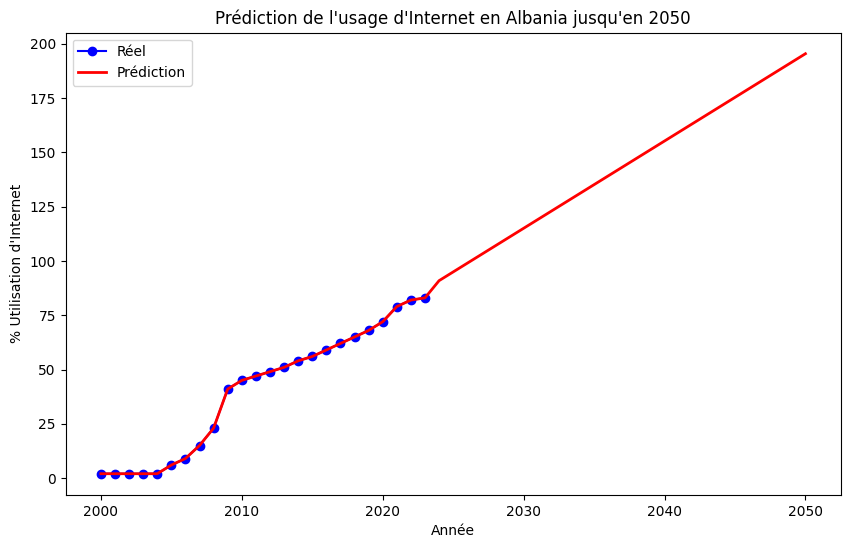

In [76]:
predict_and_plot('Albania')

In [77]:
#Visualisation for all 

ValueError: Input y contains NaN.

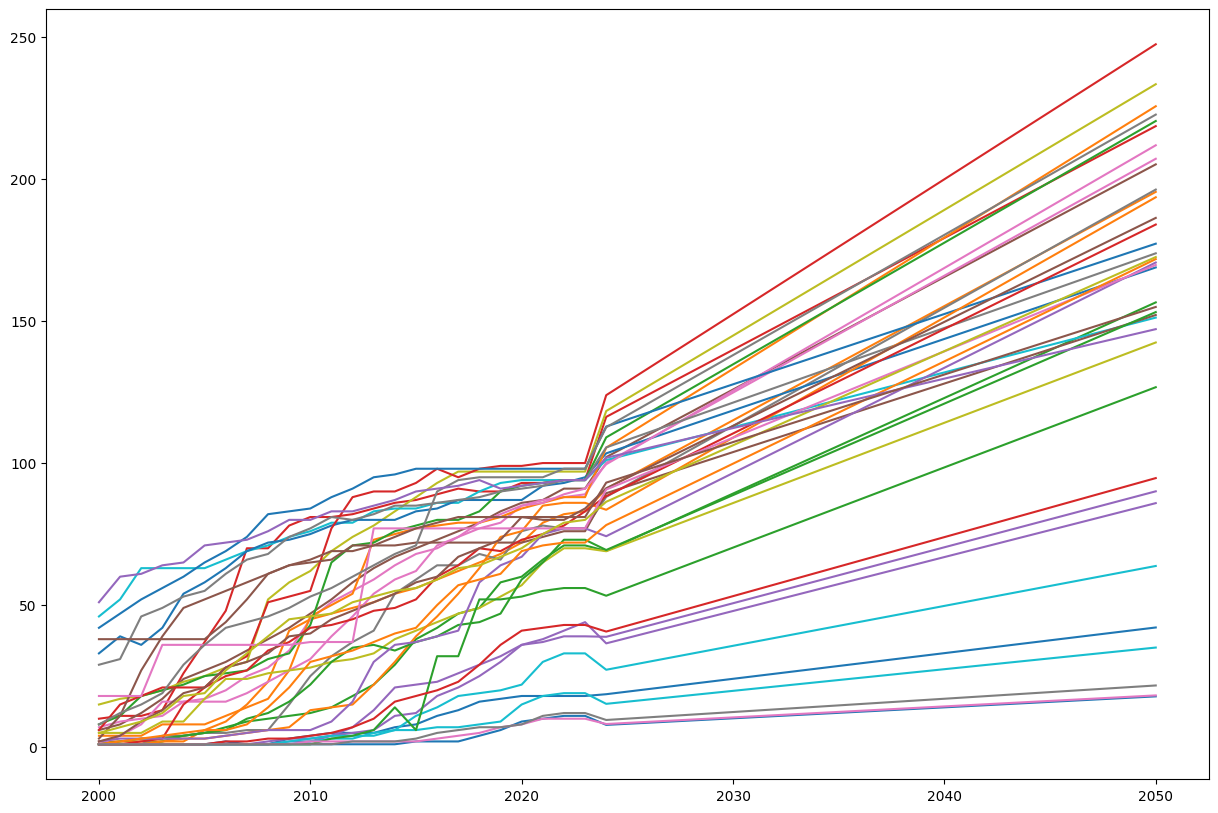

In [78]:
# Fonction pour prédire et tracer tous les pays
def plot_all_countries():
    unique_countries = df_long['Country Name'].unique()
    
    plt.figure(figsize=(15, 10))
    
    for country in unique_countries:
        country_data = df_long[df_long['Country Name'] == country]
        
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data['Internet_Usage'].values
        
        # Entraîner le modèle
        model = LinearRegression()
        model.fit(X, y)
        
        # Prédiction pour 2030 à 2050
        predictions = model.predict(future_years)
        
        plt.plot(np.concatenate((X, future_years)), np.concatenate((y, predictions)), label=country)
    
    plt.title('Prédiction de l\'utilisation d\'Internet jusqu\'en 2050 pour tous les pays')
    plt.xlabel('Année')
    plt.ylabel('% Utilisation d\'Internet')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Pays")
    plt.tight_layout()
    plt.show()

# Appel de la visualisation pour tous les pays
plot_all_countries()